In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Historical Data

In [3]:
!dir "../csv/round-3-island-data-bottle"

 Volume in drive C is Windows
 Volume Serial Number is 4C9C-5B8B

 Directory of C:\Users\josep\Documents\Coding\prosperity2\csv\round-3-island-data-bottle

2024-04-15  09:27 PM    <DIR>          .
2024-04-15  09:27 PM    <DIR>          ..
2024-04-15  09:26 PM         2,581,061 prices_round_3_day_0.csv
2024-04-15  09:26 PM         2,580,446 prices_round_3_day_1.csv
2024-04-15  09:26 PM         2,580,491 prices_round_3_day_2.csv
2024-04-15  09:26 PM           148,534 trades_round_3_day_0_nn.csv
2024-04-15  09:26 PM           142,870 trades_round_3_day_1_nn.csv
2024-04-15  09:26 PM           146,400 trades_round_3_day_2_nn.csv
               6 File(s)      8,179,802 bytes
               2 Dir(s)  23,311,953,920 bytes free


In [4]:
days = [0, 1, 2]
pricesByDay = {}
tradesByDay = {}

for day in days:
    pricesByDay[day] = pd.read_csv(f"../csv/round-3-island-data-bottle/prices_round_3_day_{day}.csv", sep=';')
    tradesByDay[day] = pd.read_csv(f"../csv/round-3-island-data-bottle/trades_round_3_day_{day}_nn.csv", sep=';')

In [5]:
pricesByDay[0].head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
0,0,0,CHOCOLATE,7999,111,NaN,NaN,NaN,NaN,8001,111,NaN,NaN,NaN,NaN,8000.0,0.0
1,0,0,STRAWBERRIES,3999,210,NaN,NaN,NaN,NaN,4001,210,NaN,NaN,NaN,NaN,4000.0,0.0
2,0,0,ROSES,14999,72,NaN,NaN,NaN,NaN,15001,72,NaN,NaN,NaN,NaN,15000.0,0.0
3,0,0,GIFT_BASKET,71348,19,71347.0,24.0,NaN,NaN,71362,19,71363.0,24.0,NaN,NaN,71355.0,0.0
4,0,100,GIFT_BASKET,71344,1,71343.0,12.0,71342.0,20.0,71355,1,71356.0,12.0,71357.0,20.0,71349.5,0.0


In [6]:
tradesByDay[0].head()

,timestamp,buyer,seller,symbol,currency,price,quantity
0,0,NaN,NaN,CHOCOLATE,SEASHELLS,8001.0,8
1,0,NaN,NaN,ROSES,SEASHELLS,15001.0,3
2,200,NaN,NaN,ROSES,SEASHELLS,15000.0,3
3,500,NaN,NaN,STRAWBERRIES,SEASHELLS,3999.0,10
4,1000,NaN,NaN,GIFT_BASKET,SEASHELLS,71360.0,2


## Prices

In [7]:
def plot_prices(product):
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        ax[i].set_title(f"Bid prices for {product} on day {day}")
        dfPrices = pricesByDay[day][lambda df: df['product'] == product]
        for colName in ['bid_price_1', 'bid_price_2', 'bid_price_3']:
            ax[i].scatter(dfPrices['timestamp'], dfPrices[colName], c='g')
        for colName in ['ask_price_1', 'ask_price_2', 'ask_price_3']:
            ax[i].scatter(dfPrices['timestamp'], dfPrices[colName], c='r')

In [8]:
products = ['CHOCOLATE', 'STRAWBERRIES', 'ROSES', 'GIFT_BASKET']
price_columns = ['bid_price_1', 'bid_price_2', 'bid_price_3', 'ask_price_1', 'ask_price_2', 'ask_price_3']
meanPricesByDay = {}

for day in days:
    meanPricesByDay[day] = pricesByDay[day].copy()
    priceCols = pricesByDay[day][price_columns]
    meanPricesByDay[day]['mean_price'] = priceCols.sum(axis=1) \
                                        / priceCols.count(numeric_only=True, axis=1)

meanPricesByDay[0].head()
# How far the mean_price deviates from mid price
(meanPricesByDay[0]['mean_price'] - meanPricesByDay[0]['mid_price']).describe()

count    40000.000000
mean         0.000021
std          0.539411
min         -5.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          5.300000
dtype: float64

In [9]:
P = {
    'CHOCOLATE': 4,
    'STRAWBERRIES': 4,
    'ROSES': 4,
    'GIFT_BASKET': 4
}

response_name = 'mean_price' # try mid_price

def getXy(product):
    X, y = [], []
    for day in days:
        df_product = meanPricesByDay[day][lambda df: df['product'] == product]
        for i in range(P[product], df_product.shape[0]):
            x = df_product.iloc[i-P[product]:i][response_name].values
            X.append(x)
            y.append(df_product.iloc[i][response_name])
           
    X = np.array(X)
    y = np.array(y)
    print(f"{X.shape[0]} training observations")
    return X, y

In [10]:
from sklearn.linear_model import LinearRegression

## Regress Chocolate

In [11]:
X_chocolate, y_chocolate = getXy('CHOCOLATE')
lm_chocolate = LinearRegression().fit(X_chocolate, y_chocolate)
lm_chocolate.intercept_, lm_chocolate.coef_

29988 training observations


(0.14240089710074244,
 array([-0.01108489,  0.00786715,  0.04070572,  0.96249293]))

## Regress Strawberries

In [12]:
X_strawberries, y_strawberries = getXy('STRAWBERRIES')
lm_strawberries = LinearRegression().fit(X_strawberries, y_strawberries)
lm_strawberries.intercept_, lm_strawberries.coef_

29988 training observations


(0.37947875425743405,
 array([-0.00548191,  0.05122488,  0.1366758 ,  0.81748684]))

## Regress Roses

In [13]:
X_roses, y_roses = getXy('ROSES')
lm_roses = LinearRegression().fit(X_roses, y_roses)
lm_roses.intercept_, lm_roses.coef_

29988 training observations


(4.238897536935838,
 array([-0.00885487,  0.00141759,  0.01359939,  0.99354437]))

## Regress Gift Basket

In [14]:
X_gift, y_gift = getXy('GIFT_BASKET')
lm_gift = LinearRegression().fit(X_gift, y_gift)
lm_gift.intercept_, lm_gift.coef_

29988 training observations


(3.180094202849432,
 array([-5.15603870e-03, -9.81008814e-04, -1.12541938e-03,  1.00721665e+00]))

## Trades

In [15]:
# Do something with the trades data sets

# Is a basket worth the same as its items

In [51]:
def plot_price_ratio():
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        timestamps = pricesByDay[day].timestamp.unique()
        prices_at_day_day_basket = pricesByDay[day][lambda x: x['product'] == 'GIFT_BASKET']['mid_price']
        prices_at_day_day_chocolate = pricesByDay[day][lambda x: x['product'] == 'CHOCOLATE']['mid_price']
        prices_at_day_day_strawberries = pricesByDay[day][lambda x: x['product'] == 'STRAWBERRIES']['mid_price']
        prices_at_day_day_roses = pricesByDay[day][lambda x: x['product'] == 'ROSES']['mid_price']
        
        prices_at_day_day_combination = 4 * prices_at_day_day_chocolate.to_numpy() + \
                                        6 * prices_at_day_day_strawberries.to_numpy() + \
                                        1 * prices_at_day_day_roses.to_numpy()
        
        ax[i].set_title(f"Price ratio for on day {day}")
        ax[i].scatter(timestamps, prices_at_day_day_basket/prices_at_day_day_combination)

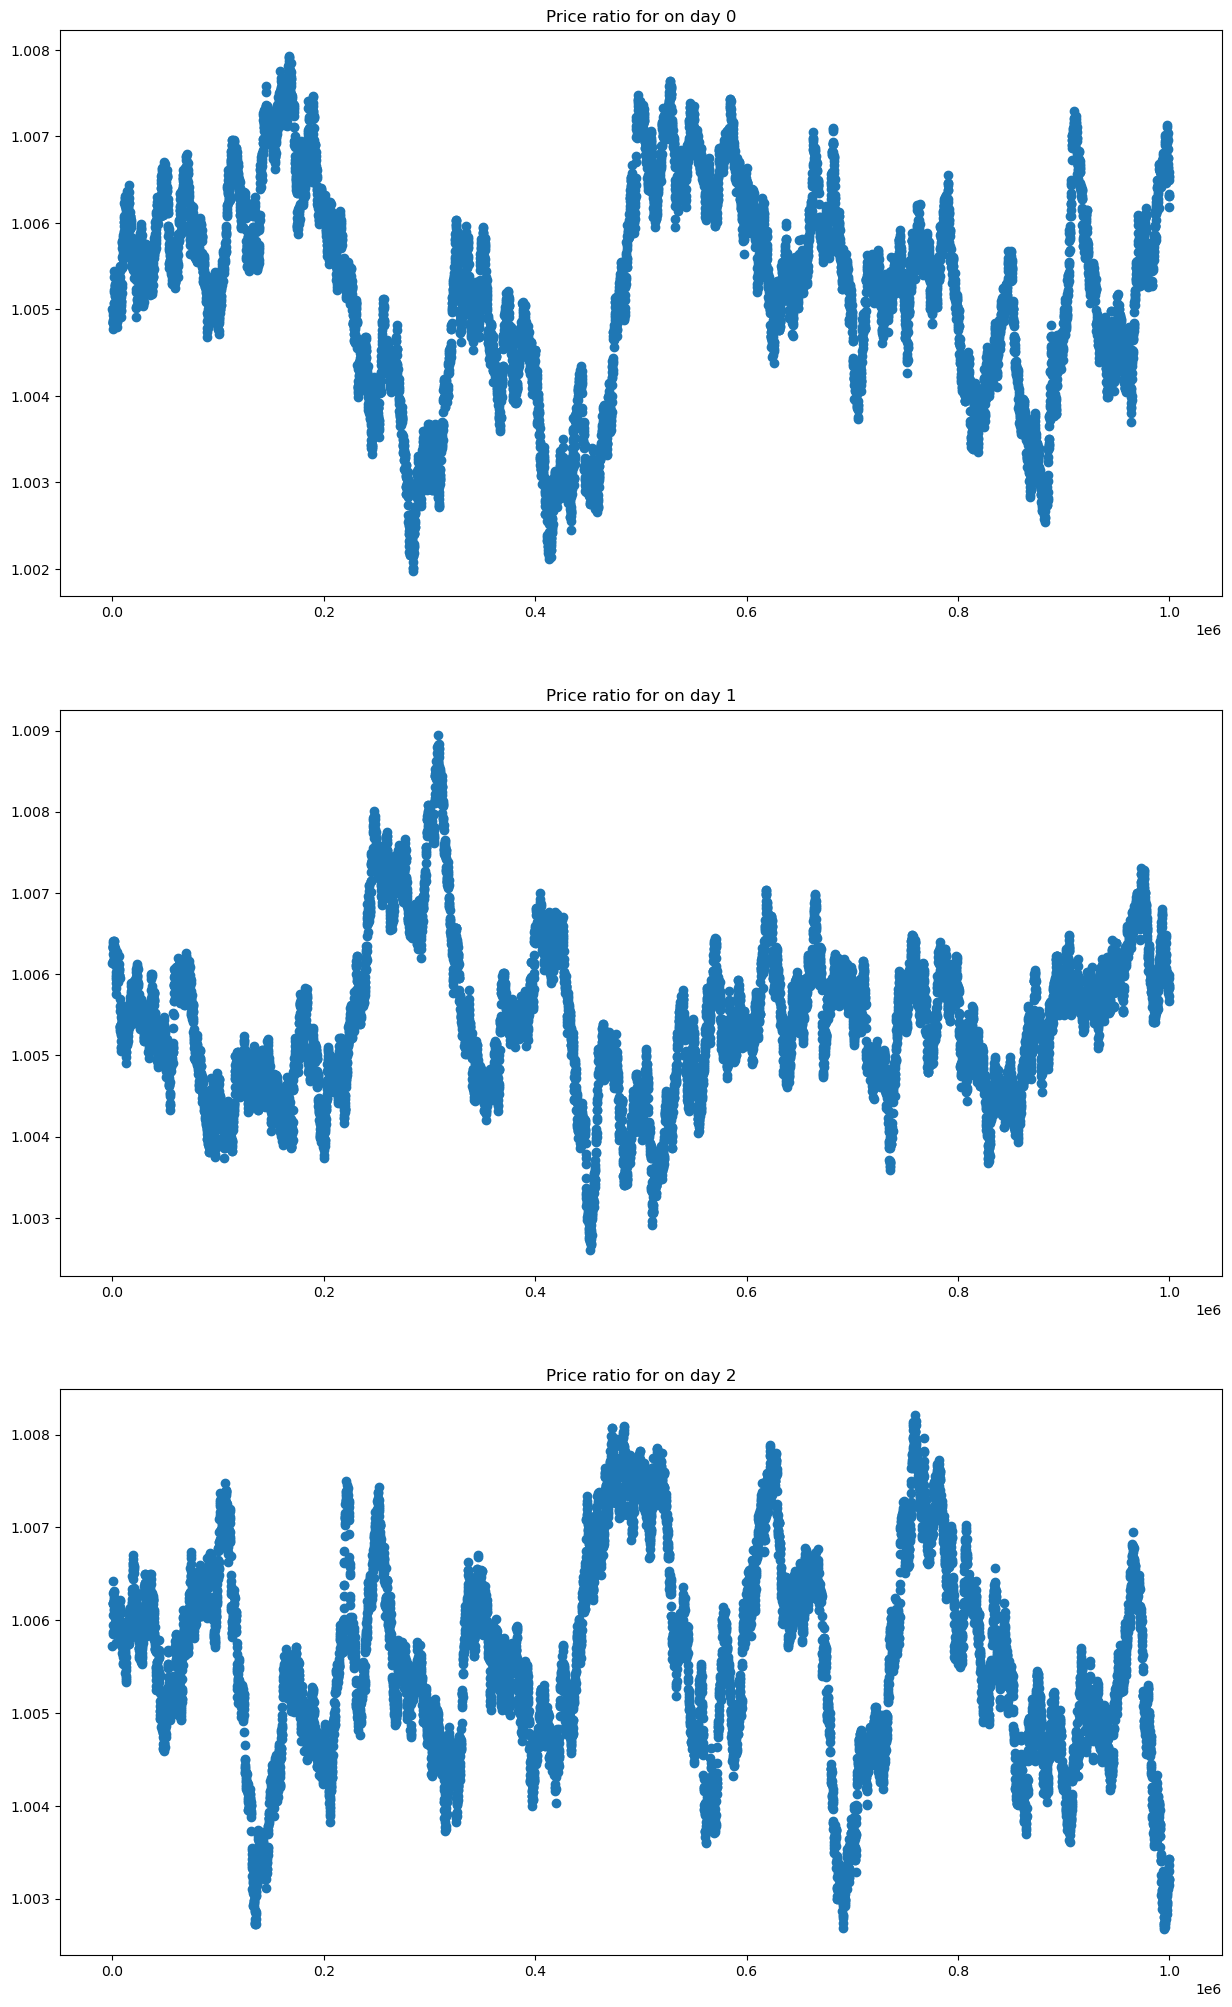

In [52]:
plot_price_ratio()

In [24]:
def plot_mid_price():
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        timestamps = pricesByDay[day].timestamp.unique()
        prices_at_day_day_basket = pricesByDay[day][lambda x: x['product'] == 'GIFT_BASKET']['mid_price']
        prices_at_day_day_chocolate = pricesByDay[day][lambda x: x['product'] == 'CHOCOLATE']['mid_price']
        prices_at_day_day_strawberries = pricesByDay[day][lambda x: x['product'] == 'STRAWBERRIES']['mid_price']
        prices_at_day_day_roses = pricesByDay[day][lambda x: x['product'] == 'ROSES']['mid_price']
        
        prices_at_day_day_combination = 4 * prices_at_day_day_chocolate.to_numpy() + \
                                        6 * prices_at_day_day_strawberries.to_numpy() + \
                                        1 * prices_at_day_day_roses.to_numpy()
        
        ax[i].set_title(f"Mid price for on day {day}")
        print(timestamps.shape, prices_at_day_day_basket.shape)
        ax[i].scatter(timestamps, prices_at_day_day_basket, c='b', label='basket')
        ax[i].scatter(timestamps, prices_at_day_day_combination, c='r', label='combination')
        ax[i].legend()

(10000,) (10000,)
(10000,) (10000,)
(10000,) (10000,)


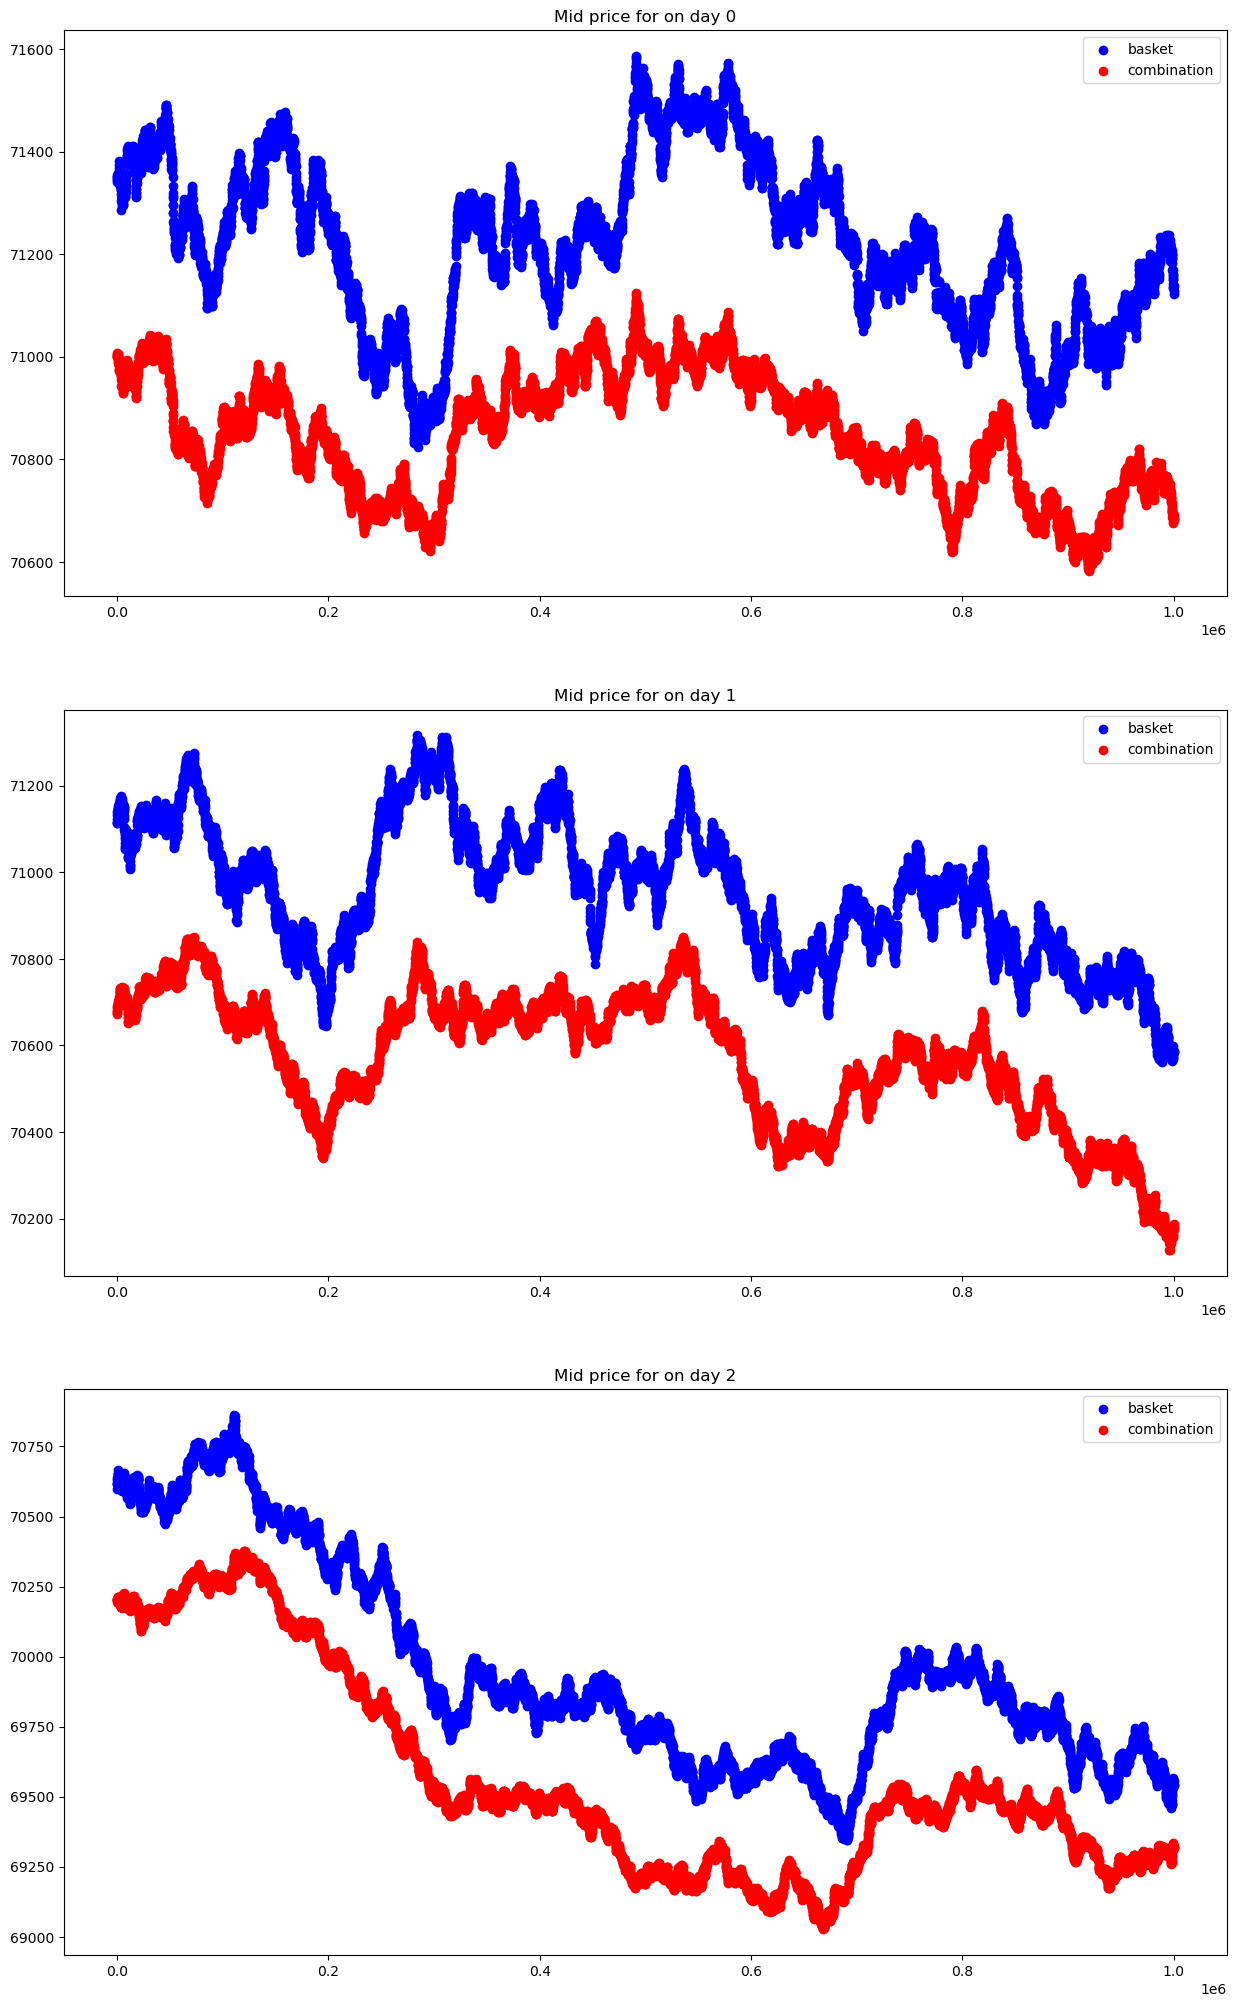

In [25]:
plot_mid_price()

In [65]:
def plot_mid_price_diff():
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        timestamps = pricesByDay[day].timestamp.unique()
        prices_at_day_day_basket = pricesByDay[day][lambda x: x['product'] == 'GIFT_BASKET']['mid_price']
        prices_at_day_day_chocolate = pricesByDay[day][lambda x: x['product'] == 'CHOCOLATE']['mid_price']
        prices_at_day_day_strawberries = pricesByDay[day][lambda x: x['product'] == 'STRAWBERRIES']['mid_price']
        prices_at_day_day_roses = pricesByDay[day][lambda x: x['product'] == 'ROSES']['mid_price']
        
        prices_at_day_day_combination = 4 * prices_at_day_day_chocolate.to_numpy() + \
                                        6 * prices_at_day_day_strawberries.to_numpy() + \
                                        1 * prices_at_day_day_roses.to_numpy()
        
        diff=prices_at_day_day_basket - prices_at_day_day_combination
        ax[i].set_title(f"Mid price for on day {day}")
        print(timestamps.shape, prices_at_day_day_basket.shape)
        ax[i].scatter(timestamps, diff - diff.mean())
        ax[i].axhline(y=0, c='r')

(10000,) (10000,)
(10000,) (10000,)
(10000,) (10000,)


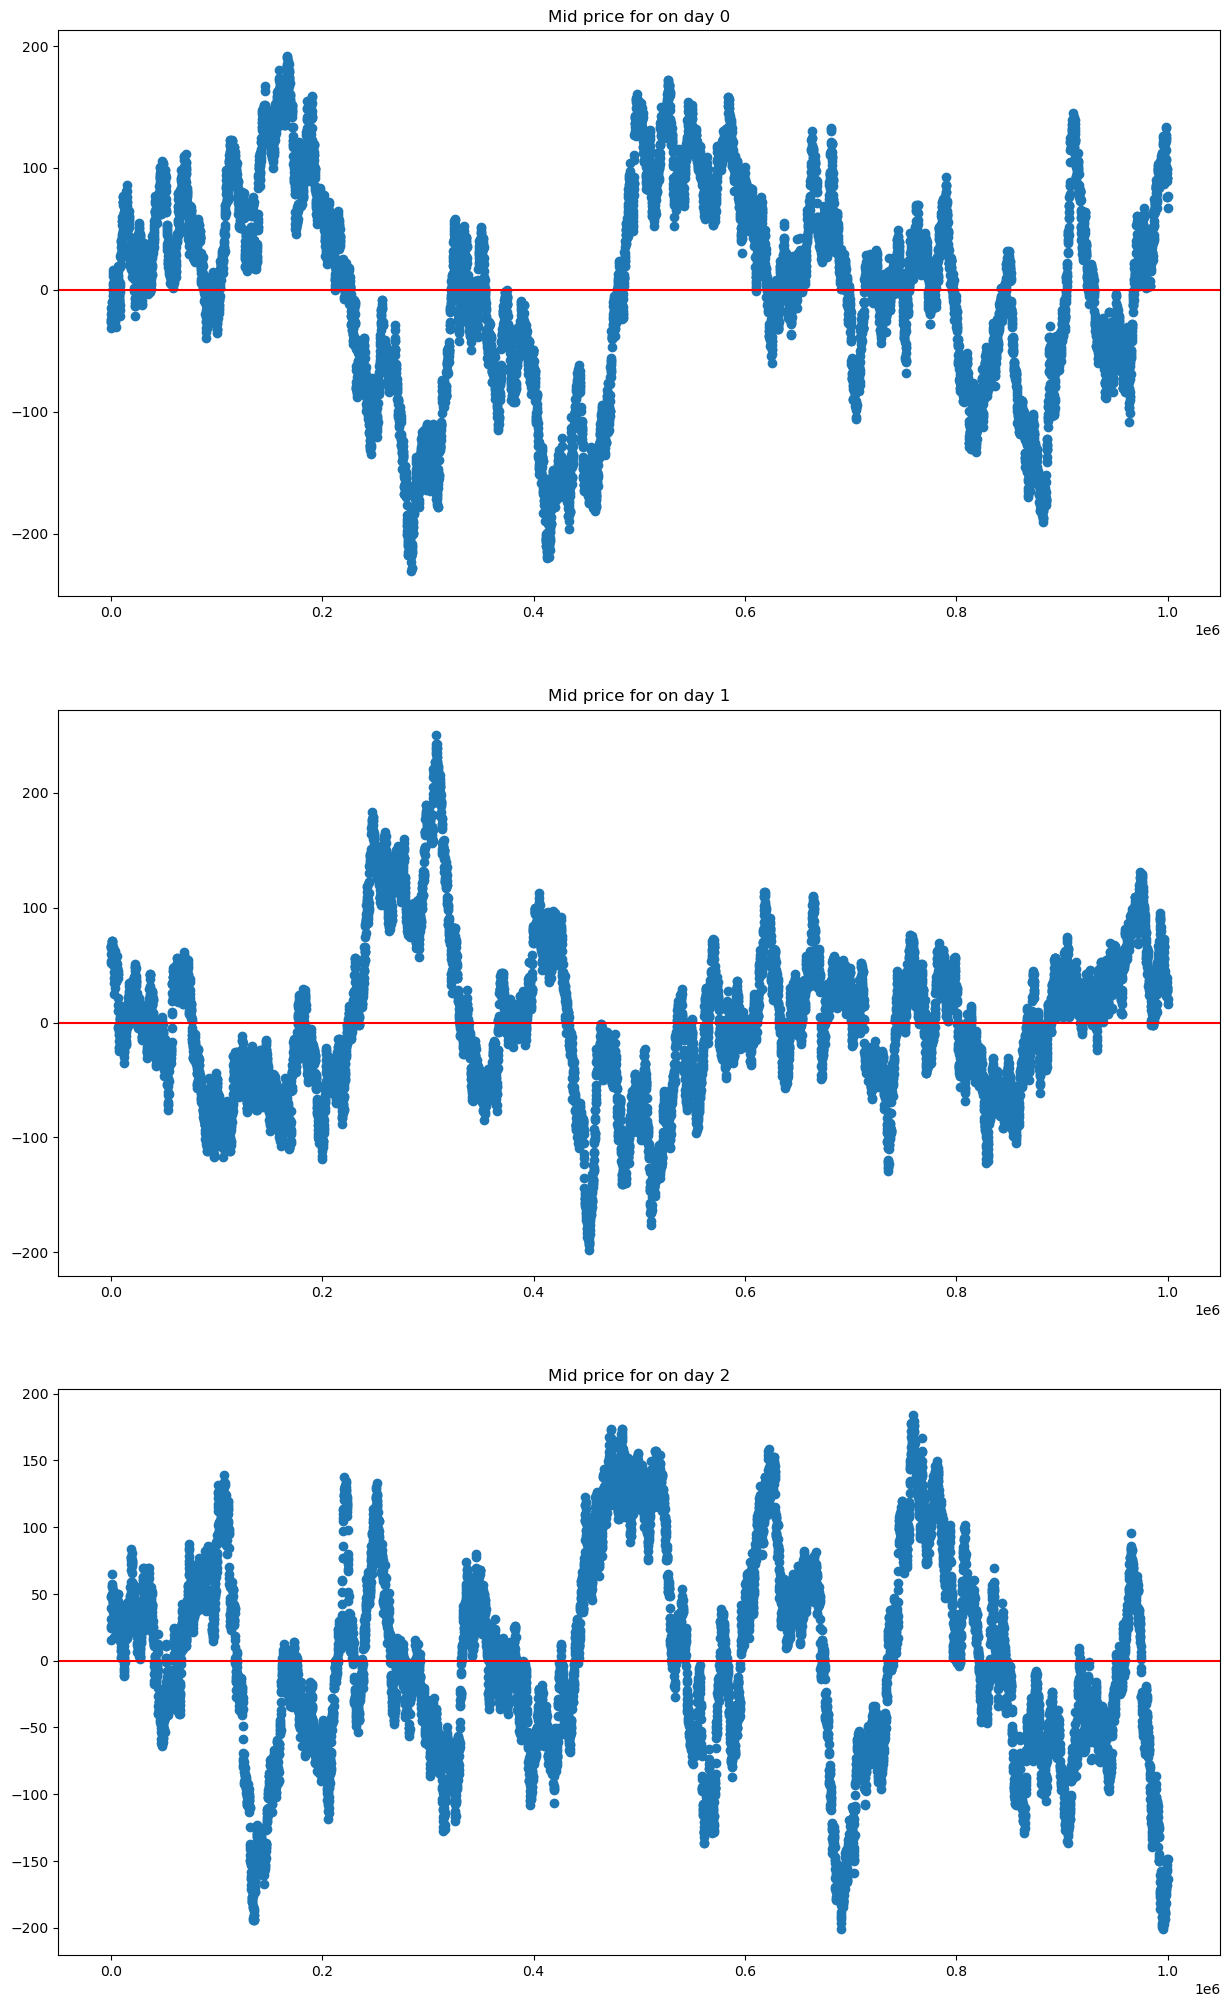

In [66]:
plot_mid_price_diff()

In [42]:
day_diff_diff = {}
def plot_mid_price_diff_diff():
    fig, ax = plt.subplots(nrows=3, figsize=(15, 25))

    for i in range(3):
        day = days[i]
        timestamps = pricesByDay[day].timestamp.unique()
        prices_at_day_day_basket = pricesByDay[day][lambda x: x['product'] == 'GIFT_BASKET']['mid_price']
        prices_at_day_day_chocolate = pricesByDay[day][lambda x: x['product'] == 'CHOCOLATE']['mid_price']
        prices_at_day_day_strawberries = pricesByDay[day][lambda x: x['product'] == 'STRAWBERRIES']['mid_price']
        prices_at_day_day_roses = pricesByDay[day][lambda x: x['product'] == 'ROSES']['mid_price']
        
        prices_at_day_day_combination = 4 * prices_at_day_day_chocolate.to_numpy() + \
                                        6 * prices_at_day_day_strawberries.to_numpy() + \
                                        1 * prices_at_day_day_roses.to_numpy()
        
        ax[i].set_title(f"Mid price for on day {day}")
        print(timestamps.shape, prices_at_day_day_basket.shape)
        diff_diff = np.diff(prices_at_day_day_basket - prices_at_day_day_combination)
        ax[i].scatter(timestamps[:-1], diff_diff)
        day_diff_diff[day]=diff_diff

(10000,) (10000,)
(10000,) (10000,)
(10000,) (10000,)


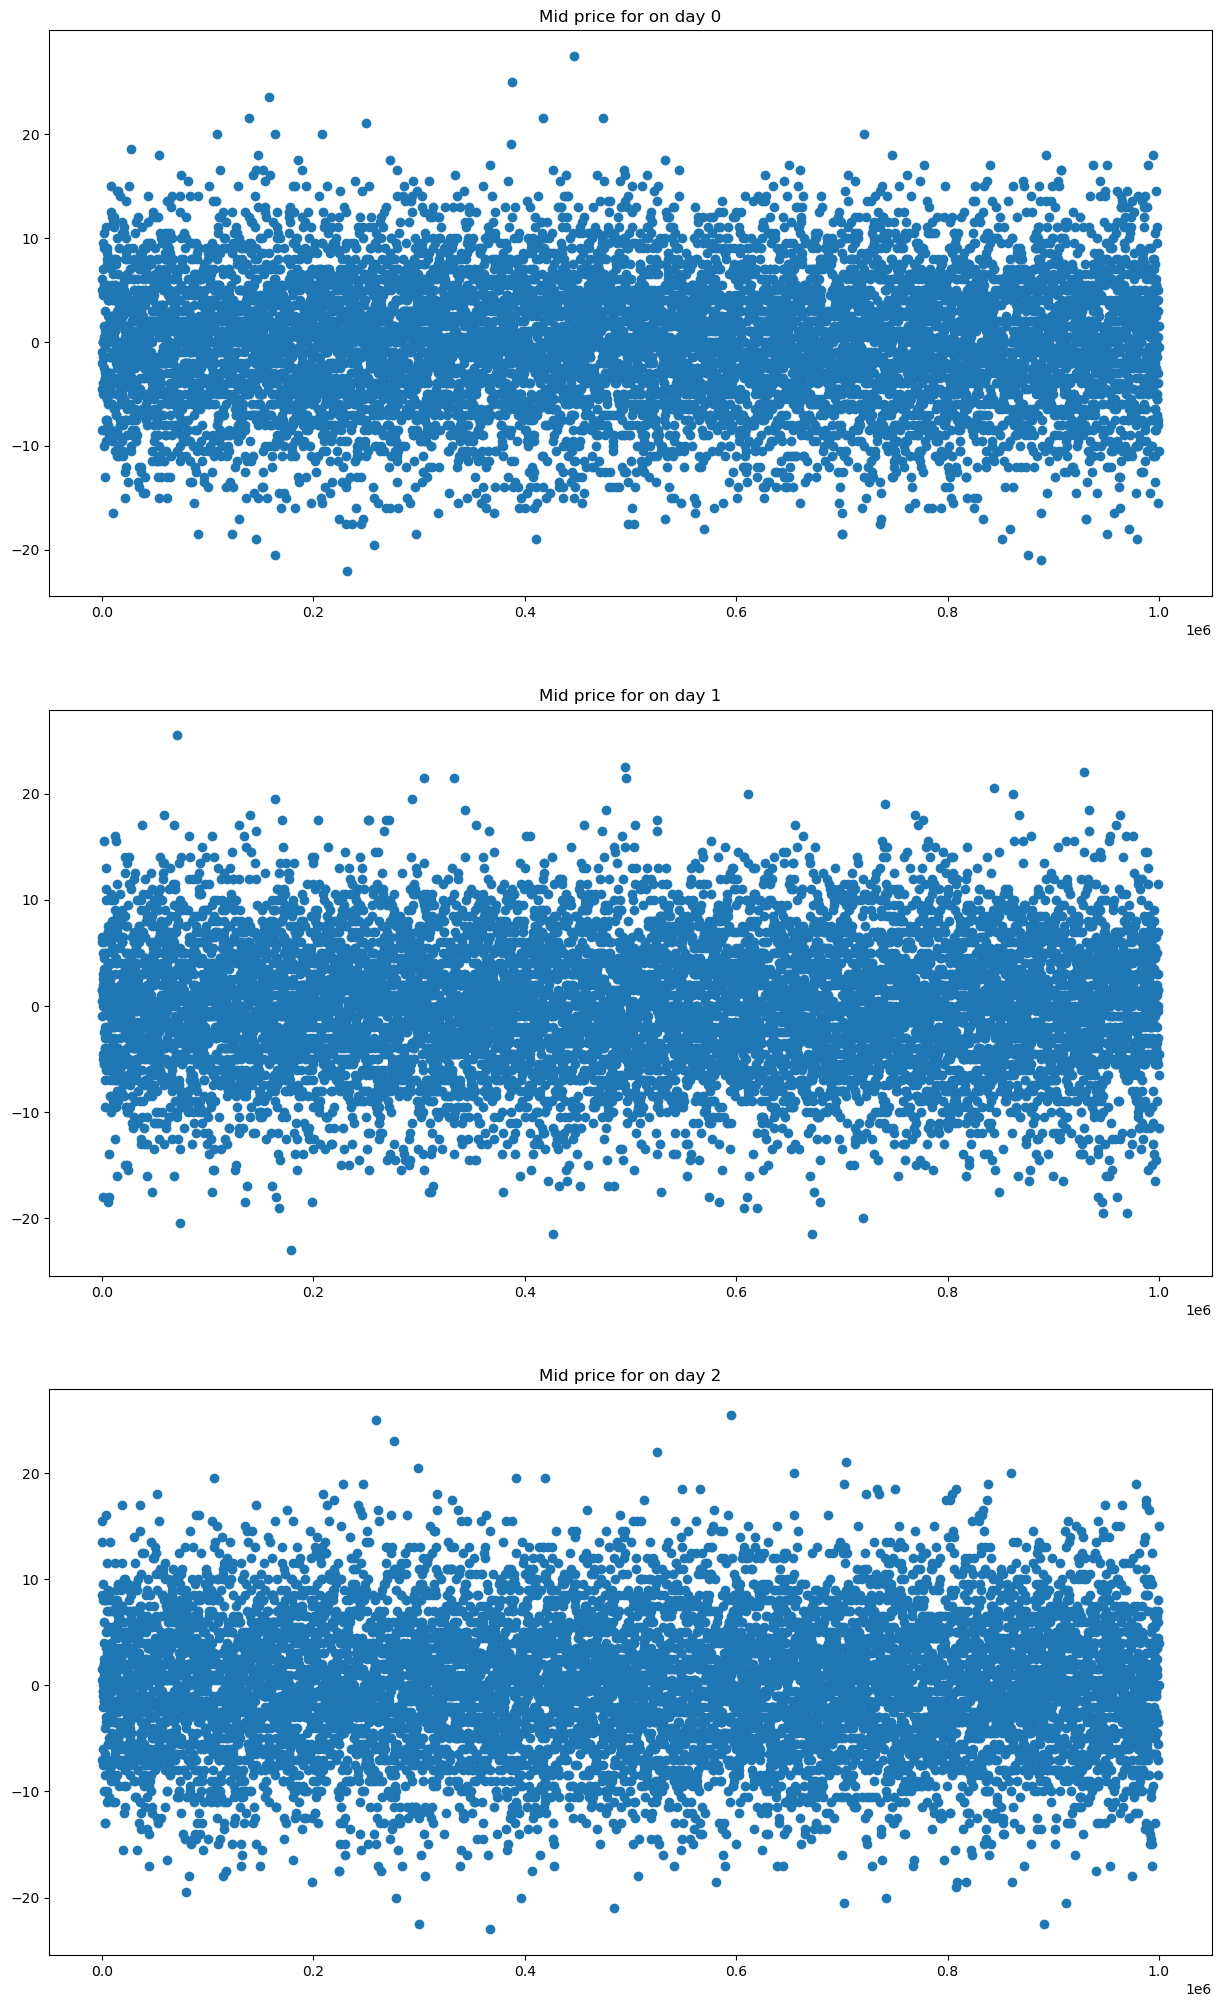

In [43]:
plot_mid_price_diff_diff()

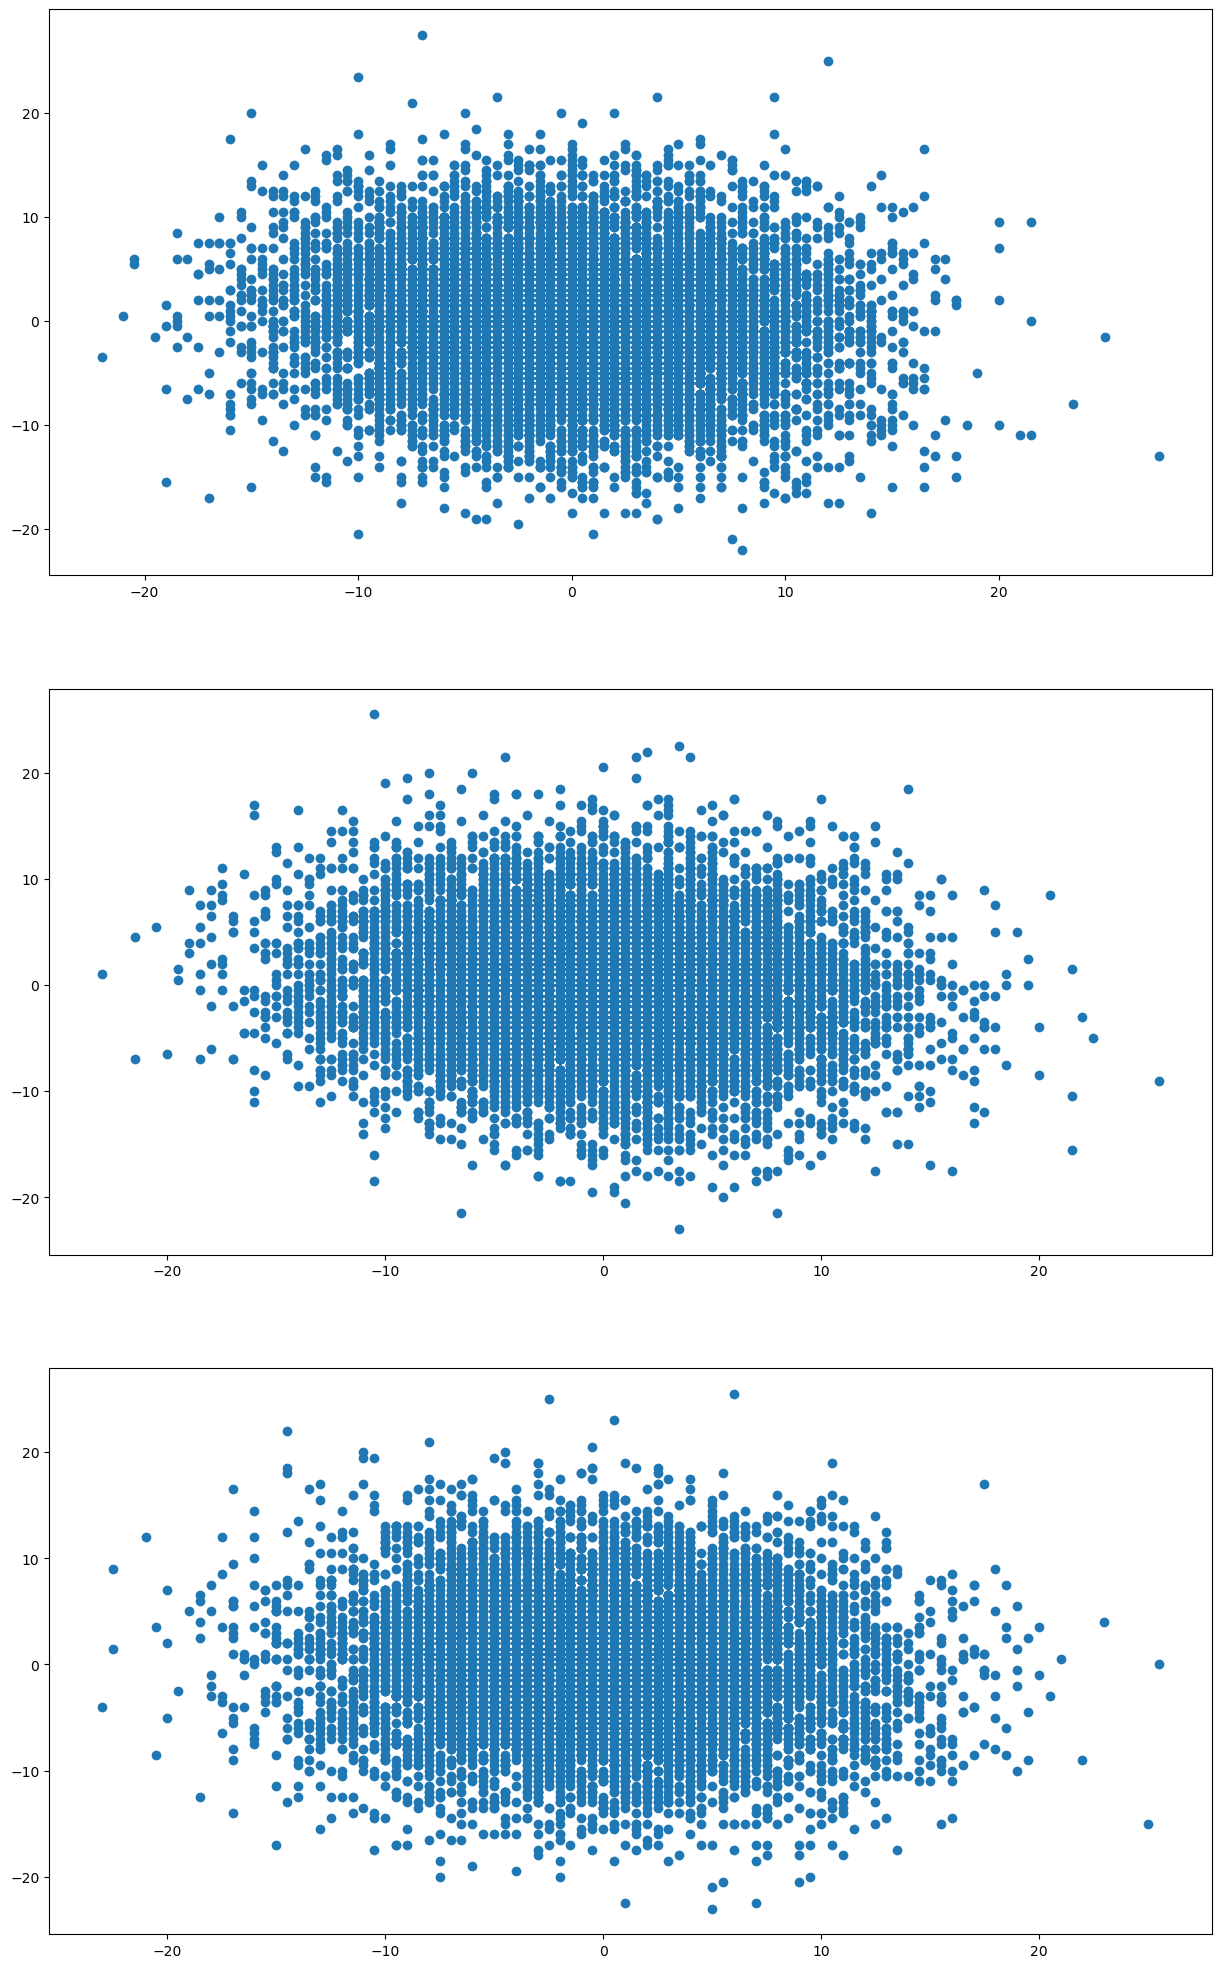

In [69]:
fig, ax = plt.subplots(nrows=3, figsize=(15, 25))
for day in days:
    ax[day].scatter(day_diff_diff[day][:-1], day_diff_diff[day][1:])

In [45]:
df_diff_diff=pd.DataFrame(day_diff_diff)
print(df_diff_diff.shape)
df_diff_diff.head()

(9999, 3)


,0,1,2
0,-8.5,1.5,15.5
1,-1.0,6.5,-7.0
2,-2.0,6.0,1.5
3,-4.5,-1.0,13.5
4,5.0,1.5,8.5


In [46]:
df_diff_diff.to_csv('../data/diff_diff.csv')

In [48]:
!dir "../data/diff_diff.csv""

 Volume in drive C is Windows
 Volume Serial Number is 4C9C-5B8B

 Directory of C:\Users\josep\Documents\Coding\prosperity2\data

2024-04-16  09:33 PM           196,903 diff_diff.csv
               1 File(s)        196,903 bytes
               0 Dir(s)  23,252,348,928 bytes free
